In [4]:
# Some steps required until these Python modules are properly installed...
import sys
sys.path.append('../Modules')
sys.path.append('../../../../veneer-py')
# Get the Source scripting components (veneer) and GBR specific stuff
import gbr
%pylab inline
import pandas as pd
import geopandas as gpd

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Point the system at a particular output directory...
gbr.init('D:/Beckers/outputs/Scenario 1/')

# Initialise the Veneer (Source scripting tool)
v = gbr.veneer()

In [6]:
# Retrieve the intersected SC/FU polygons from Source
intersected_sc_fus = v.run_server_side_script('result=scenario.GeographicData.IntersectedSCFUPolygons')['Response']

In [7]:
# Have a look at what properties are available...
intersected_sc_fus['features'][0]['properties']

{'IntFUs': 'Other', 'IntSCFU': None, 'IntSCs': 'SC #3'}

In [8]:
# Get a results set
results = gbr.Results('Beta3815')
results.available()

['climateTable',
 'CrossTabOutputsTable',
 'fuAreasTable',
 'FURatesTable',
 'FUSummaryTable',
 'OutletNodesRatesTable',
 'OverallSummaryTable',
 'ParameterTable',
 'RawResults',
 'RegionalSourceSinkSummaryTable',
 'RegionalSummaryTable',
 'SourceSinkPerFuSummaryTable',
 'SourceSinkSummaryTable',
 'TimeSeriesTable']

In [9]:
# Retrieve the raw results table
raw = results.get('RawResults')
raw

,ModelElementType,ModelElement,FU,BudgetElement,Process,Total_Load_in_Kg
Constituent,,,,,,
P_Particulate,Catchment,SC #3,Cropping,Undefined,Supply,0.000000e+00
Ametryn,Catchment,SC #3,Cropping,Hillslope no source distinction,Supply,0.000000e+00
Ametryn,Catchment,SC #3,Cropping,Seepage,Supply,0.000000e+00
Ametryn,Catchment,SC #3,Cropping,Leached,Other,0.000000e+00
Atrazine,Catchment,SC #3,Cropping,Hillslope no source distinction,Supply,0.000000e+00
Atrazine,Catchment,SC #3,Cropping,Seepage,Supply,0.000000e+00
Atrazine,Catchment,SC #3,Cropping,Leached,Other,0.000000e+00
Tebuthiuron,Catchment,SC #3,Cropping,Undefined,Supply,0.000000e+00
Sediment - Fine,Catchment,SC #3,Cropping,Hillslope surface soil,Supply,0.000000e+00


In [10]:
# Filter raw results for catchment data (ie not link related)
catchmentData = raw[raw.ModelElementType=='Catchment']
catchmentData

,ModelElementType,ModelElement,FU,BudgetElement,Process,Total_Load_in_Kg
Constituent,,,,,,
P_Particulate,Catchment,SC #3,Cropping,Undefined,Supply,0.000000e+00
Ametryn,Catchment,SC #3,Cropping,Hillslope no source distinction,Supply,0.000000e+00
Ametryn,Catchment,SC #3,Cropping,Seepage,Supply,0.000000e+00
Ametryn,Catchment,SC #3,Cropping,Leached,Other,0.000000e+00
Atrazine,Catchment,SC #3,Cropping,Hillslope no source distinction,Supply,0.000000e+00
Atrazine,Catchment,SC #3,Cropping,Seepage,Supply,0.000000e+00
Atrazine,Catchment,SC #3,Cropping,Leached,Other,0.000000e+00
Tebuthiuron,Catchment,SC #3,Cropping,Undefined,Supply,0.000000e+00
Sediment - Fine,Catchment,SC #3,Cropping,Hillslope surface soil,Supply,0.000000e+00


In [11]:
# Filter again for a constituent of interest and a process...
# TODO - should be able to do all that follows for all constituents/processes and generate a single output shapefile/dbf
constituent = 'Sediment - Fine'
process = 'Hillslope surface soil'
relevantData = catchmentData[np.logical_and(catchmentData.index==constituent,catchmentData.BudgetElement==process)].copy()
relevantData

,ModelElementType,ModelElement,FU,BudgetElement,Process,Total_Load_in_Kg
Constituent,,,,,,
Sediment - Fine,Catchment,SC #3,Cropping,Hillslope surface soil,Supply,0.000000e+00
Sediment - Fine,Catchment,SC #3,Grazing,Hillslope surface soil,Supply,0.000000e+00
Sediment - Fine,Catchment,SC #3,Grazing Closed,Hillslope surface soil,Supply,2.715877e+08
Sediment - Fine,Catchment,SC #3,Other,Hillslope surface soil,Supply,0.000000e+00
Sediment - Fine,Catchment,SC #3,Water,Hillslope surface soil,Supply,0.000000e+00
Sediment - Fine,Catchment,SC #2,Cropping,Hillslope surface soil,Supply,0.000000e+00
Sediment - Fine,Catchment,SC #2,Grazing,Hillslope surface soil,Supply,2.475111e+08
Sediment - Fine,Catchment,SC #2,Grazing Closed,Hillslope surface soil,Supply,4.712771e+07
Sediment - Fine,Catchment,SC #2,Other,Hillslope surface soil,Supply,0.000000e+00


In [12]:
# Convert load to tons/year
# TODO: tons/ha/year - could load the FU areas table from the results, OR rely on the polygon areas
conversion = 1000.0*results.runDetails.yearsOfRecording
relevantData['Load_t_y'] = relevantData['Total_Load_in_Kg']/conversion
del relevantData['Total_Load_in_Kg']
relevantData

,ModelElementType,ModelElement,FU,BudgetElement,Process,Load_t_y
Constituent,,,,,,
Sediment - Fine,Catchment,SC #3,Cropping,Hillslope surface soil,Supply,0.000000
Sediment - Fine,Catchment,SC #3,Grazing,Hillslope surface soil,Supply,0.000000
Sediment - Fine,Catchment,SC #3,Grazing Closed,Hillslope surface soil,Supply,44643.295798
Sediment - Fine,Catchment,SC #3,Other,Hillslope surface soil,Supply,0.000000
Sediment - Fine,Catchment,SC #3,Water,Hillslope surface soil,Supply,0.000000
Sediment - Fine,Catchment,SC #2,Cropping,Hillslope surface soil,Supply,0.000000
Sediment - Fine,Catchment,SC #2,Grazing,Hillslope surface soil,Supply,40685.603606
Sediment - Fine,Catchment,SC #2,Grazing Closed,Hillslope surface soil,Supply,7746.803464
Sediment - Fine,Catchment,SC #2,Other,Hillslope surface soil,Supply,0.000000


In [13]:
# Reindex the data by subcatchment and FU, drop other columns (all the same value anyway)
loadData = relevantData[['ModelElement','FU','Load_t_y']]
loadData = loadData.set_index(['ModelElement','FU'])
loadData

Load_t_y
ModelElement FU                          
SC #3        Cropping            0.000000
             Grazing             0.000000
             Grazing Closed  44643.295798
             Other               0.000000
             Water               0.000000
SC #2        Cropping            0.000000
             Grazing         40685.603606
             Grazing Closed   7746.803464
             Other               0.000000
             Water               0.000000
SC #5        Cropping            0.000000
             Grazing         16468.724646
             Grazing Closed      0.000000
             Other               0.000000
             Water               0.000000
SC #4        Cropping            0.000000
             Grazing          8167.461414
             Grazing Closed   4024.274322
             Other               0.000000
             Water               0.000000
SC #1        Cropping            0.000000
             Grazing          8773.526601
             Grazing Closed      0.000000
             Other               0.000000
             Water               0.000000

In [14]:
# Now, back to the polygons we got from Source...
features = intersected_sc_fus['features']

In [15]:
# Create a GeoDataTable - basically like an in-memory representation of a shapfile or a table from a GeoDatabase
coverage = gpd.GeoDataFrame.from_features(features)
coverage

,IntFUs,IntSCFU,IntSCs,geometry
0,Other,None,SC #3,"(POLYGON ((225143.65296203 -2853499.7490278, 2..."
1,Grazing Closed,None,SC #3,"(POLYGON ((225143.65296203 -2852749.7490278, 2..."
2,Cropping,None,SC #3,"(POLYGON ((233268.65296203 -2845999.7490278, 2..."
3,Other,None,SC #4,"(POLYGON ((295143.65296203 -2771624.7490278, 2..."
4,Water,None,SC #3,"(POLYGON ((296518.65296203 -2876999.7490278, 2..."
5,Grazing Closed,None,SC #4,"(POLYGON ((297018.65296203 -2783499.7490278, 2..."
6,Grazing,None,SC #5,"(POLYGON ((298893.65296203 -2722249.7490278, 2..."
7,Other,None,SC #5,"(POLYGON ((305768.65296203 -2733249.7490278, 3..."
8,Grazing,None,SC #4,"(POLYGON ((306268.65296203 -2766999.7490278, 3..."
9,Cropping,None,SC #5,"(POLYGON ((310518.65296203 -2730249.7490278, 3..."


In [16]:
# Rename a few columns, etc to make the subsequent join easier...
coverage.rename(columns={'IntFUs':'FU','IntSCFU':'DROP','IntSCs':'ModelElement'},inplace=True)
coverage.sort_values('ModelElement',inplace=True)

In [17]:
# re-index by subcatchment and FU
coverage.set_index(['ModelElement','FU'],inplace=True)
coverage

DROP  \
ModelElement FU                     
SC #1        Water           None   
             Cropping        None   
             Grazing         None   
             Other           None   
SC #2        Water           None   
             Cropping        None   
             Other           None   
             Grazing Closed  None   
             Grazing         None   
SC #3        Other           None   
             Water           None   
             Cropping        None   
             Grazing Closed  None   
SC #4        Grazing         None   
             Cropping        None   
             Water           None   
             Grazing Closed  None   
             Other           None   
SC #5        Other           None   
             Grazing         None   
             Cropping        None   
             Water           None   

                                                                      geometry  
ModelElement FU                                                                 
SC #1        Water           (POLYGON ((382768.65296203 -2653749.7490278, 3...  
             Cropping        (POLYGON ((379768.65296203 -2657499.7490278, 3...  
             Grazing         (POLYGON ((370768.65296203 -2657249.7490278, 3...  
             Other           (POLYGON ((383518.65296203 -2658999.7490278, 3...  
SC #2        Water           (POLYGON ((392018.65296203 -2740999.7490278, 3...  
             Cropping        (POLYGON ((382018.65296203 -2816624.7490278, 3...  
             Other           (POLYGON ((381393.65296203 -2817749.7490278, 3...  
             Grazing Closed  (POLYGON ((381393.65296203 -2817249.7490278, 3...  
             Grazing         (POLYGON ((380768.65296203 -2748499.7490278, 3...  
SC #3        Other           (POLYGON ((225143.65296203 -2853499.7490278, 2...  
             Water           (POLYGON ((296518.65296203 -2876999.7490278, 2...  
             Cropping        (POLYGON ((233268.65296203 -2845999.7490278, 2...  
             Grazing Closed  (POLYGON ((225143.65296203 -2852749.7490278, 2...  
SC #4        Grazing         (POLYGON ((306268.65296203 -2766999.7490278, 3...  
             Cropping        (POLYGON ((344768.6529925476 -2805999.7490278,...  
             Water           (POLYGON ((352018.65296203 -2802999.7490278, 3...  
             Grazing Closed  (POLYGON ((297018.65296203 -2783499.7490278, 2...  
             Other           (POLYGON ((295143.65296203 -2771624.7490278, 2...  
SC #5        Other           (POLYGON ((305768.65296203 -2733249.7490278, 3...  
             Grazing         (POLYGON ((298893.65296203 -2722249.7490278, 2...  
             Cropping        (POLYGON ((310518.65296203 -2730249.7490278, 3...  
             Water           (POLYGON ((323268.65296203 -2718999.7490278, 3...

In [18]:
#### NOW THIS IS THE IMPORTANT BIT!
# Join the spatial coverage (now indexed by SC + FU) with the loads table (Also indexed by SC and FU)
spatialLoads = coverage.join(loadData)
spatialLoads

DROP  \
ModelElement FU                     
SC #1        Water           None   
             Cropping        None   
             Grazing         None   
             Other           None   
SC #2        Water           None   
             Cropping        None   
             Other           None   
             Grazing Closed  None   
             Grazing         None   
SC #3        Other           None   
             Water           None   
             Cropping        None   
             Grazing Closed  None   
SC #4        Grazing         None   
             Cropping        None   
             Water           None   
             Grazing Closed  None   
             Other           None   
SC #5        Other           None   
             Grazing         None   
             Cropping        None   
             Water           None   

                                                                      geometry  \
ModelElement FU                                                                  
SC #1        Water           (POLYGON ((382768.65296203 -2653749.7490278, 3...   
             Cropping        (POLYGON ((379768.65296203 -2657499.7490278, 3...   
             Grazing         (POLYGON ((370768.65296203 -2657249.7490278, 3...   
             Other           (POLYGON ((383518.65296203 -2658999.7490278, 3...   
SC #2        Water           (POLYGON ((392018.65296203 -2740999.7490278, 3...   
             Cropping        (POLYGON ((382018.65296203 -2816624.7490278, 3...   
             Other           (POLYGON ((381393.65296203 -2817749.7490278, 3...   
             Grazing Closed  (POLYGON ((381393.65296203 -2817249.7490278, 3...   
             Grazing         (POLYGON ((380768.65296203 -2748499.7490278, 3...   
SC #3        Other           (POLYGON ((225143.65296203 -2853499.7490278, 2...   
             Water           (POLYGON ((296518.65296203 -2876999.7490278, 2...   
             Cropping        (POLYGON ((233268.65296203 -2845999.7490278, 2...   
             Grazing Closed  (POLYGON ((225143.65296203 -2852749.7490278, 2...   
SC #4        Grazing         (POLYGON ((306268.65296203 -2766999.7490278, 3...   
             Cropping        (POLYGON ((344768.6529925476 -2805999.7490278,...   
             Water           (POLYGON ((352018.65296203 -2802999.7490278, 3...   
             Grazing Closed  (POLYGON ((297018.65296203 -2783499.7490278, 2...   
             Other           (POLYGON ((295143.65296203 -2771624.7490278, 2...   
SC #5        Other           (POLYGON ((305768.65296203 -2733249.7490278, 3...   
             Grazing         (POLYGON ((298893.65296203 -2722249.7490278, 2...   
             Cropping        (POLYGON ((310518.65296203 -2730249.7490278, 3...   
             Water           (POLYGON ((323268.65296203 -2718999.7490278, 3...   

                                 Load_t_y  
ModelElement FU                            
SC #1        Water               0.000000  
             Cropping            0.000000  
             Grazing          8773.526601  
             Other               0.000000  
SC #2        Water               0.000000  
             Cropping            0.000000  
             Other               0.000000  
             Grazing Closed   7746.803464  
             Grazing         40685.603606  
SC #3        Other               0.000000  
             Water               0.000000  
             Cropping            0.000000  
             Grazing Closed  44643.295798  
SC #4        Grazing          8167.461414  
             Cropping            0.000000  
             Water               0.000000  
             Grazing Closed   4024.274322  
             Other               0.000000  
SC #5        Other               0.000000  
             Grazing         16468.724646  
             Cropping            0.000000  
             Water               0.000000

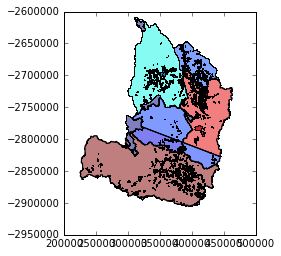

In [19]:
# We can plot the result... 
# TODO: Make this much nicer...
spatialLoads.plot(column='Load_t_y')
figsize(6,6)
#colorbar()

In [20]:
# For some reason, in the join, the geometry column loses its geometry-ness, which prevents us from subsequently writing,
# it out as a shapefile... So fix that here...
spatialLoads.geometry = gpd.GeoSeries(spatialLoads.geometry)

In [21]:
# Now write it out as a shapefile for use in Arc...
spatialLoads.to_file('hillslope_surface_fine_sediment.shp')